In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./resources/DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


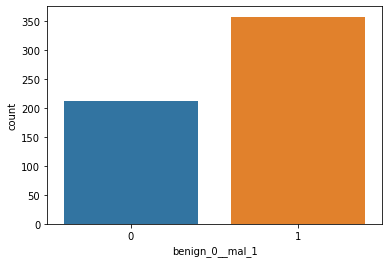

In [7]:
sns.countplot(x='benign_0__mal_1', data=df);

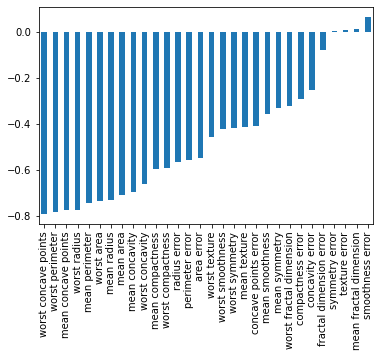

In [13]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar');

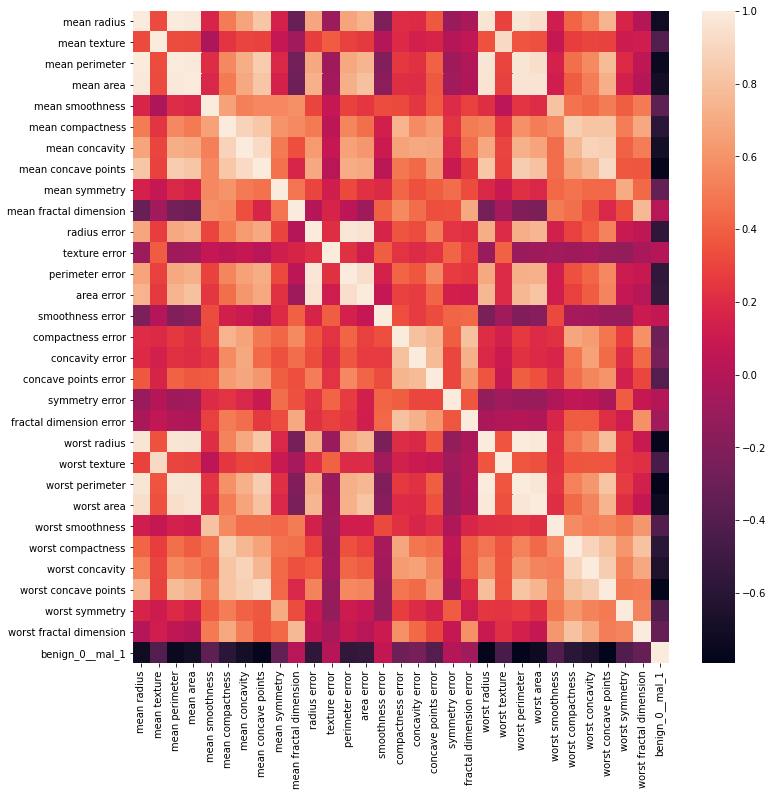

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr());

In [26]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [18]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
import tensorflow as tf

In [29]:
X_train.shape

(426, 30)

In [30]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(15, activation='relu'))
# BINARY CLASSIFICATION
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [31]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6208 - val_loss: 0.5840
Epoch 2/600
426/426 [==============================] - 0s 140us/sample - loss: 0.5613 - val_loss: 0.5292
Epoch 3/600
426/426 [==============================] - 0s 138us/sample - loss: 0.5057 - val_loss: 0.4731
Epoch 4/600
426/426 [==============================] - 0s 136us/sample - loss: 0.4474 - val_loss: 0.4125
Epoch 5/600
426/426 [==============================] - 0s 136us/sample - loss: 0.3888 - val_loss: 0.3566
Epoch 6/600
426/426 [==============================] - 0s 136us/sample - loss: 0.3384 - val_loss: 0.3061
Epoch 7/600
426/426 [==============================] - 0s 135us/sample - loss: 0.2975 - val_loss: 0.2717
Epoch 8/600
426/426 [==============================] - 0s 138us/sample - loss: 0.2691 - val_loss: 0.2470
Epoch 9/600
426/426 [==============================] - 0s 137us/sample - loss: 0.2455 - val_loss: 0.2253
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0556 - val_loss: 0.1474
Epoch 79/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0569 - val_loss: 0.1258
Epoch 80/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0511 - val_loss: 0.1316
Epoch 81/600
426/426 [==============================] - 0s 128us/sample - loss: 0.0518 - val_loss: 0.1284
Epoch 82/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0481 - val_loss: 0.1363
Epoch 83/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0482 - val_loss: 0.1276
Epoch 84/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0493 - val_loss: 0.1319
Epoch 85/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0519 - val_loss: 0.1395
Epoch 86/600
426/426 [==============================] - 0s 134us/sample - loss: 0.0490 - val_loss: 0.1339
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0364 - val_loss: 0.1607
Epoch 156/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0358 - val_loss: 0.1540
Epoch 157/600
426/426 [==============================] - 0s 126us/sample - loss: 0.0355 - val_loss: 0.1618
Epoch 158/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0359 - val_loss: 0.1591
Epoch 159/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0356 - val_loss: 0.1545
Epoch 160/600
426/426 [==============================] - 0s 128us/sample - loss: 0.0357 - val_loss: 0.1563
Epoch 161/600
426/426 [==============================] - 0s 125us/sample - loss: 0.0347 - val_loss: 0.1643
Epoch 162/600
426/426 [==============================] - 0s 126us/sample - loss: 0.0351 - val_loss: 0.1560
Epoch 163/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0355 - val_loss: 0.1589
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 128us/sample - loss: 0.0203 - val_loss: 0.2192
Epoch 308/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0234 - val_loss: 0.1853
Epoch 309/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0191 - val_loss: 0.1814
Epoch 310/600
426/426 [==============================] - 0s 126us/sample - loss: 0.0211 - val_loss: 0.1999
Epoch 311/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0194 - val_loss: 0.2017
Epoch 312/600
426/426 [==============================] - 0s 128us/sample - loss: 0.0210 - val_loss: 0.1722
Epoch 313/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0215 - val_loss: 0.1962
Epoch 314/600
426/426 [==============================] - 0s 126us/sample - loss: 0.0175 - val_loss: 0.1944
Epoch 315/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0185 - val_loss: 0.1845
Epoch 316/600
426/426 [============================

426/426 [==============================] - 0s 126us/sample - loss: 0.0086 - val_loss: 0.2555
Epoch 460/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0084 - val_loss: 0.2606
Epoch 461/600
426/426 [==============================] - 0s 128us/sample - loss: 0.0088 - val_loss: 0.2352
Epoch 462/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0121 - val_loss: 0.2252
Epoch 463/600
426/426 [==============================] - 0s 128us/sample - loss: 0.0157 - val_loss: 0.3422
Epoch 464/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0113 - val_loss: 0.2432
Epoch 465/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0080 - val_loss: 0.2841
Epoch 466/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0102 - val_loss: 0.2544
Epoch 467/600
426/426 [==============================] - 0s 128us/sample - loss: 0.0095 - val_loss: 0.2377
Epoch 468/600
426/426 [============================

In [32]:
loss = pd.DataFrame(model.history.history)

In [33]:
loss.head()

,loss,val_loss
0,0.620828,0.584046
1,0.561250,0.529180
2,0.505731,0.473073
3,0.447405,0.412520
4,0.388756,0.356580


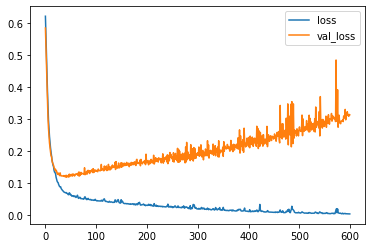

In [35]:
loss.plot();

In [36]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [48]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)

In [49]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 261us/sample - loss: 0.0649 - val_loss: 0.0879
Epoch 2/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0828 - val_loss: 0.1105
Epoch 3/600
426/426 [==============================] - 0s 200us/sample - loss: 0.0969 - val_loss: 0.1045
Epoch 4/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0983 - val_loss: 0.0842
Epoch 5/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0938 - val_loss: 0.0913
Epoch 6/600
426/426 [==============================] - 0s 174us/sample - loss: 0.0835 - val_loss: 0.0939
Epoch 7/600
426/426 [==============================] - 0s 202us/sample - loss: 0.0908 - val_loss: 0.1045
Epoch 8/600
426/426 [==============================] - 0s 180us/sample - loss: 0.0895 - val_loss: 0.0979
Epoch 9/600
426/426 [==============================] - 0s 178us/sample - loss: 0.0901 - val_loss: 0.0930
Epoch 10/

Epoch 28/600
426/426 [==============================] - 0s 209us/sample - loss: 0.0998 - val_loss: 0.1030
Epoch 29/600
426/426 [==============================] - 0s 154us/sample - loss: 0.0811 - val_loss: 0.0908
Epoch 30/600
426/426 [==============================] - 0s 156us/sample - loss: 0.0828 - val_loss: 0.1076
Epoch 31/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0917 - val_loss: 0.0968
Epoch 32/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0795 - val_loss: 0.0980
Epoch 33/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0864 - val_loss: 0.1025
Epoch 34/600
426/426 [==============================] - 0s 157us/sample - loss: 0.1040 - val_loss: 0.0897
Epoch 35/600
426/426 [==============================] - 0s 153us/sample - loss: 0.0683 - val_loss: 0.0988
Epoch 36/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0749 - val_loss: 0.1058
Epoch 37/600
426/426 [========================

426/426 [==============================] - 0s 158us/sample - loss: 0.0693 - val_loss: 0.1137
Epoch 56/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0701 - val_loss: 0.1009
Epoch 57/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0688 - val_loss: 0.0946
Epoch 58/600
426/426 [==============================] - 0s 165us/sample - loss: 0.0801 - val_loss: 0.1004
Epoch 59/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0852 - val_loss: 0.0974
Epoch 60/600
426/426 [==============================] - 0s 156us/sample - loss: 0.0688 - val_loss: 0.1143
Epoch 61/600
426/426 [==============================] - 0s 148us/sample - loss: 0.1020 - val_loss: 0.0866
Epoch 62/600
426/426 [==============================] - 0s 151us/sample - loss: 0.0726 - val_loss: 0.0859
Epoch 63/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0738 - val_loss: 0.1173
Epoch 64/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 144us/sample - loss: 0.0841 - val_loss: 0.1019
Epoch 83/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0802 - val_loss: 0.1113
Epoch 84/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0565 - val_loss: 0.0954
Epoch 85/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0720 - val_loss: 0.1034
Epoch 86/600
426/426 [==============================] - 0s 147us/sample - loss: 0.0708 - val_loss: 0.1105
Epoch 87/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0847 - val_loss: 0.1189
Epoch 88/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0680 - val_loss: 0.1145
Epoch 89/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0733 - val_loss: 0.1040
Epoch 90/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0566 - val_loss: 0.0954
Epoch 91/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 187us/sample - loss: 0.0860 - val_loss: 0.0967
Epoch 110/600
426/426 [==============================] - 0s 183us/sample - loss: 0.0661 - val_loss: 0.1129
Epoch 111/600
426/426 [==============================] - 0s 154us/sample - loss: 0.0642 - val_loss: 0.1050
Epoch 112/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0722 - val_loss: 0.1107
Epoch 113/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0621 - val_loss: 0.1024
Epoch 114/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0523 - val_loss: 0.1027
Epoch 115/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0705 - val_loss: 0.1092
Epoch 116/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0655 - val_loss: 0.1107
Epoch 117/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0441 - val_loss: 0.1104
Epoch 118/600
426/426 [============================

Epoch 136/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0498 - val_loss: 0.1048
Epoch 137/600
426/426 [==============================] - 0s 146us/sample - loss: 0.0563 - val_loss: 0.1109
Epoch 138/600
426/426 [==============================] - 0s 148us/sample - loss: 0.0486 - val_loss: 0.1103
Epoch 139/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0553 - val_loss: 0.1237
Epoch 140/600
426/426 [==============================] - 0s 153us/sample - loss: 0.0417 - val_loss: 0.1147
Epoch 141/600
426/426 [==============================] - 0s 148us/sample - loss: 0.0545 - val_loss: 0.1251
Epoch 142/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0610 - val_loss: 0.1055
Epoch 143/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0490 - val_loss: 0.1188
Epoch 144/600
426/426 [==============================] - 0s 147us/sample - loss: 0.0560 - val_loss: 0.1248
Epoch 145/600
426/426 [==============

Epoch 163/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0617 - val_loss: 0.1094
Epoch 164/600
426/426 [==============================] - 0s 194us/sample - loss: 0.0569 - val_loss: 0.1148
Epoch 165/600
426/426 [==============================] - 0s 149us/sample - loss: 0.0637 - val_loss: 0.1307
Epoch 166/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0545 - val_loss: 0.1159
Epoch 167/600
426/426 [==============================] - 0s 144us/sample - loss: 0.0517 - val_loss: 0.1133
Epoch 168/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0496 - val_loss: 0.1211
Epoch 169/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0470 - val_loss: 0.1217
Epoch 170/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0480 - val_loss: 0.1274
Epoch 171/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0472 - val_loss: 0.1032
Epoch 172/600
426/426 [==============

Epoch 190/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0388 - val_loss: 0.1381
Epoch 191/600
426/426 [==============================] - 0s 144us/sample - loss: 0.0481 - val_loss: 0.1247
Epoch 192/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0535 - val_loss: 0.1226
Epoch 193/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0424 - val_loss: 0.1327
Epoch 194/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0544 - val_loss: 0.1140
Epoch 195/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0486 - val_loss: 0.1236
Epoch 196/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0305 - val_loss: 0.1350
Epoch 197/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0374 - val_loss: 0.1234
Epoch 198/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0311 - val_loss: 0.1435
Epoch 199/600
426/426 [==============

Epoch 217/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0493 - val_loss: 0.1217
Epoch 218/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0365 - val_loss: 0.1350
Epoch 219/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0527 - val_loss: 0.1268
Epoch 220/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0390 - val_loss: 0.1380
Epoch 221/600
426/426 [==============================] - 0s 144us/sample - loss: 0.0423 - val_loss: 0.1260
Epoch 222/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0529 - val_loss: 0.1189
Epoch 223/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0419 - val_loss: 0.1320
Epoch 224/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0436 - val_loss: 0.1207
Epoch 225/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0450 - val_loss: 0.1269
Epoch 226/600
426/426 [==============

Epoch 244/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0360 - val_loss: 0.1569
Epoch 245/600
426/426 [==============================] - 0s 154us/sample - loss: 0.0472 - val_loss: 0.1304
Epoch 246/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0368 - val_loss: 0.1450
Epoch 247/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0464 - val_loss: 0.1370
Epoch 248/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0393 - val_loss: 0.1539
Epoch 249/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0428 - val_loss: 0.1360
Epoch 250/600
426/426 [==============================] - 0s 173us/sample - loss: 0.0384 - val_loss: 0.1514
Epoch 251/600
426/426 [==============================] - 0s 146us/sample - loss: 0.0421 - val_loss: 0.1593
Epoch 252/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0390 - val_loss: 0.1756
Epoch 253/600
426/426 [==============

Epoch 271/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0396 - val_loss: 0.1431
Epoch 272/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0386 - val_loss: 0.1519
Epoch 273/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0350 - val_loss: 0.1501
Epoch 274/600
426/426 [==============================] - 0s 134us/sample - loss: 0.0524 - val_loss: 0.1350
Epoch 275/600
426/426 [==============================] - 0s 144us/sample - loss: 0.0572 - val_loss: 0.1438
Epoch 276/600
426/426 [==============================] - 0s 208us/sample - loss: 0.0457 - val_loss: 0.1375
Epoch 277/600
426/426 [==============================] - 0s 211us/sample - loss: 0.0415 - val_loss: 0.1507
Epoch 278/600
426/426 [==============================] - 0s 202us/sample - loss: 0.0290 - val_loss: 0.1448
Epoch 279/600
426/426 [==============================] - 0s 210us/sample - loss: 0.0357 - val_loss: 0.1519
Epoch 280/600
426/426 [==============

Epoch 298/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0361 - val_loss: 0.1545
Epoch 299/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0421 - val_loss: 0.1438
Epoch 300/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0346 - val_loss: 0.1454
Epoch 301/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0363 - val_loss: 0.1503
Epoch 302/600
426/426 [==============================] - 0s 149us/sample - loss: 0.0328 - val_loss: 0.1511
Epoch 303/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0304 - val_loss: 0.1538
Epoch 304/600
426/426 [==============================] - 0s 146us/sample - loss: 0.0378 - val_loss: 0.1745
Epoch 305/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0282 - val_loss: 0.1582
Epoch 306/600
426/426 [==============================] - 0s 144us/sample - loss: 0.0339 - val_loss: 0.1572
Epoch 307/600
426/426 [==============

Epoch 325/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0520 - val_loss: 0.1677
Epoch 326/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0441 - val_loss: 0.1689
Epoch 327/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0375 - val_loss: 0.1482
Epoch 328/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0512 - val_loss: 0.1705
Epoch 329/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0397 - val_loss: 0.1640
Epoch 330/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0297 - val_loss: 0.1587
Epoch 331/600
426/426 [==============================] - 0s 148us/sample - loss: 0.0291 - val_loss: 0.1675
Epoch 332/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0363 - val_loss: 0.1622
Epoch 333/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0298 - val_loss: 0.1682
Epoch 334/600
426/426 [==============

Epoch 352/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0328 - val_loss: 0.1947
Epoch 353/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0413 - val_loss: 0.1846
Epoch 354/600
426/426 [==============================] - 0s 151us/sample - loss: 0.0265 - val_loss: 0.1763
Epoch 355/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0404 - val_loss: 0.1777
Epoch 356/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0285 - val_loss: 0.1672
Epoch 357/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0346 - val_loss: 0.1612
Epoch 358/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0435 - val_loss: 0.1696
Epoch 359/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0308 - val_loss: 0.1796
Epoch 360/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0322 - val_loss: 0.1797
Epoch 361/600
426/426 [==============

Epoch 379/600
426/426 [==============================] - 0s 154us/sample - loss: 0.0349 - val_loss: 0.1912
Epoch 380/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0367 - val_loss: 0.1694
Epoch 381/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0212 - val_loss: 0.1677
Epoch 382/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0396 - val_loss: 0.1647
Epoch 383/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0311 - val_loss: 0.1872
Epoch 384/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0263 - val_loss: 0.1951
Epoch 385/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0223 - val_loss: 0.1893
Epoch 386/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0555 - val_loss: 0.1578
Epoch 387/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0381 - val_loss: 0.1517
Epoch 388/600
426/426 [==============

Epoch 406/600
426/426 [==============================] - 0s 134us/sample - loss: 0.0254 - val_loss: 0.1885
Epoch 407/600
426/426 [==============================] - 0s 134us/sample - loss: 0.0272 - val_loss: 0.1762
Epoch 408/600
426/426 [==============================] - 0s 148us/sample - loss: 0.0262 - val_loss: 0.1906
Epoch 409/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0298 - val_loss: 0.1879
Epoch 410/600
426/426 [==============================] - 0s 203us/sample - loss: 0.0395 - val_loss: 0.1729
Epoch 411/600
426/426 [==============================] - 0s 192us/sample - loss: 0.0246 - val_loss: 0.1773
Epoch 412/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0323 - val_loss: 0.1831
Epoch 413/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0258 - val_loss: 0.1831
Epoch 414/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0298 - val_loss: 0.1833
Epoch 415/600
426/426 [==============

Epoch 433/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0409 - val_loss: 0.1906
Epoch 434/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0307 - val_loss: 0.1819
Epoch 435/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0337 - val_loss: 0.1768
Epoch 436/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0466 - val_loss: 0.1880
Epoch 437/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0301 - val_loss: 0.2034
Epoch 438/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0491 - val_loss: 0.1671
Epoch 439/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0306 - val_loss: 0.1751
Epoch 440/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0286 - val_loss: 0.1958
Epoch 441/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0392 - val_loss: 0.1773
Epoch 442/600
426/426 [==============

Epoch 460/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0289 - val_loss: 0.1760
Epoch 461/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0327 - val_loss: 0.1910
Epoch 462/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0303 - val_loss: 0.1990
Epoch 463/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0240 - val_loss: 0.1699
Epoch 464/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0373 - val_loss: 0.1811
Epoch 465/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0326 - val_loss: 0.1926
Epoch 466/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0274 - val_loss: 0.1955
Epoch 467/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0248 - val_loss: 0.1931
Epoch 468/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0254 - val_loss: 0.2048
Epoch 469/600
426/426 [==============

Epoch 487/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0294 - val_loss: 0.2176
Epoch 488/600
426/426 [==============================] - 0s 134us/sample - loss: 0.0298 - val_loss: 0.2122
Epoch 489/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0207 - val_loss: 0.2118
Epoch 490/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0237 - val_loss: 0.2077
Epoch 491/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0139 - val_loss: 0.2193
Epoch 492/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0403 - val_loss: 0.2272
Epoch 493/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0250 - val_loss: 0.2527
Epoch 494/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0320 - val_loss: 0.2213
Epoch 495/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0193 - val_loss: 0.2228
Epoch 496/600
426/426 [==============

Epoch 514/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0190 - val_loss: 0.2508
Epoch 515/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0363 - val_loss: 0.2444
Epoch 516/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0260 - val_loss: 0.2345
Epoch 517/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0208 - val_loss: 0.2364
Epoch 518/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0251 - val_loss: 0.2319
Epoch 519/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0169 - val_loss: 0.2270
Epoch 520/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0168 - val_loss: 0.2381
Epoch 521/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0155 - val_loss: 0.2496
Epoch 522/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0153 - val_loss: 0.2470
Epoch 523/600
426/426 [==============

Epoch 541/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0260 - val_loss: 0.2457
Epoch 542/600
426/426 [==============================] - 0s 134us/sample - loss: 0.0278 - val_loss: 0.2529
Epoch 543/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0237 - val_loss: 0.2530
Epoch 544/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0341 - val_loss: 0.2466
Epoch 545/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0238 - val_loss: 0.2416
Epoch 546/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0337 - val_loss: 0.2635
Epoch 547/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0360 - val_loss: 0.2413
Epoch 548/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0233 - val_loss: 0.2453
Epoch 549/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0224 - val_loss: 0.2298
Epoch 550/600
426/426 [==============

Epoch 568/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0316 - val_loss: 0.2400
Epoch 569/600
426/426 [==============================] - 0s 134us/sample - loss: 0.0333 - val_loss: 0.2361
Epoch 570/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0211 - val_loss: 0.2354
Epoch 571/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0230 - val_loss: 0.2505
Epoch 572/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0176 - val_loss: 0.2474
Epoch 573/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0289 - val_loss: 0.2343
Epoch 574/600
426/426 [==============================] - 0s 134us/sample - loss: 0.0136 - val_loss: 0.2528
Epoch 575/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0195 - val_loss: 0.2483
Epoch 576/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0235 - val_loss: 0.2522
Epoch 577/600
426/426 [==============

Epoch 595/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0263 - val_loss: 0.2594
Epoch 596/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0228 - val_loss: 0.2448
Epoch 597/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0164 - val_loss: 0.2525
Epoch 598/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0203 - val_loss: 0.2475
Epoch 599/600
426/426 [==============================] - 0s 134us/sample - loss: 0.0263 - val_loss: 0.2456
Epoch 600/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0294 - val_loss: 0.2637


<AxesSubplot:>

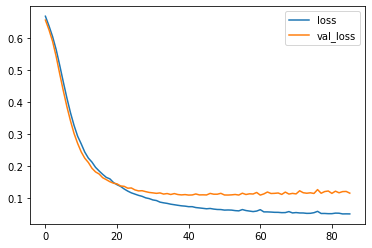

In [39]:
model_loss = pd.DataFrame(model.history.history)

model_loss.plot();

In [40]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [41]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6970 - val_loss: 0.6699
Epoch 2/600
426/426 [==============================] - 0s 175us/sample - loss: 0.6870 - val_loss: 0.6495
Epoch 3/600
426/426 [==============================] - 0s 165us/sample - loss: 0.6617 - val_loss: 0.6286
Epoch 4/600
426/426 [==============================] - 0s 154us/sample - loss: 0.6426 - val_loss: 0.6057
Epoch 5/600
426/426 [==============================] - 0s 154us/sample - loss: 0.6351 - val_loss: 0.5868
Epoch 6/600
426/426 [==============================] - 0s 150us/sample - loss: 0.6110 - val_loss: 0.5640
Epoch 7/600
426/426 [==============================] - 0s 148us/sample - loss: 0.5816 - val_loss: 0.5373
Epoch 8/600
426/426 [==============================] - 0s 145us/sample - loss: 0.5919 - val_loss: 0.5133
Epoch 9/600
426/426 [==============================] - 0s 151us/sample - loss: 0.5554 - val_loss: 0.4867
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 191us/sample - loss: 0.1312 - val_loss: 0.1060
Epoch 79/600
426/426 [==============================] - 0s 153us/sample - loss: 0.1217 - val_loss: 0.0895
Epoch 80/600
426/426 [==============================] - 0s 148us/sample - loss: 0.0962 - val_loss: 0.0910
Epoch 81/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0882 - val_loss: 0.0894
Epoch 82/600
426/426 [==============================] - 0s 155us/sample - loss: 0.1223 - val_loss: 0.0907
Epoch 83/600
426/426 [==============================] - 0s 156us/sample - loss: 0.1120 - val_loss: 0.1038
Epoch 84/600
426/426 [==============================] - 0s 149us/sample - loss: 0.1356 - val_loss: 0.0888
Epoch 85/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0953 - val_loss: 0.0985
Epoch 86/600
426/426 [==============================] - 0s 144us/sample - loss: 0.1071 - val_loss: 0.0984
Epoch 87/600
426/426 [========================

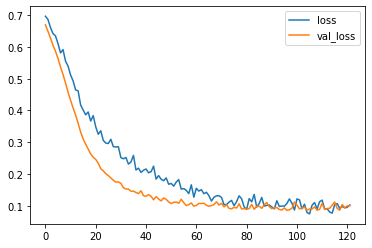

In [42]:
model_loss = pd.DataFrame(model.history.history)

model_loss.plot();

In [44]:
predictions = model.predict_classes(X_test)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [47]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 4 84]]
